In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

In [2]:
# Load Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Normalize & Reshape images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)  # Shape: (28, 28, 1)
x_test = np.expand_dims(x_test, -1)

In [4]:
# Add Noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)  # Keep values between 0 and 1
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [5]:
# Build Autoencoder
input_img = Input(shape=(28, 28, 1))

In [6]:
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [7]:
# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [8]:
# Compile the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train_noisy, x_train,epochs=10,batch_size=128,shuffle=True,validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.3899 - val_loss: 0.3111
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3069 - val_loss: 0.3057
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3029 - val_loss: 0.3028
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3010 - val_loss: 0.3010
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2979 - val_loss: 0.2994
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2972 - val_loss: 0.2984
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2965 - val_loss: 0.2972
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2948 - val_loss: 0.2964
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2945 - val_loss: 0.2961
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2930 - val_loss: 0.2949


In [9]:
# Denoise test images
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


# Visualize Noisy vs Denoised Images


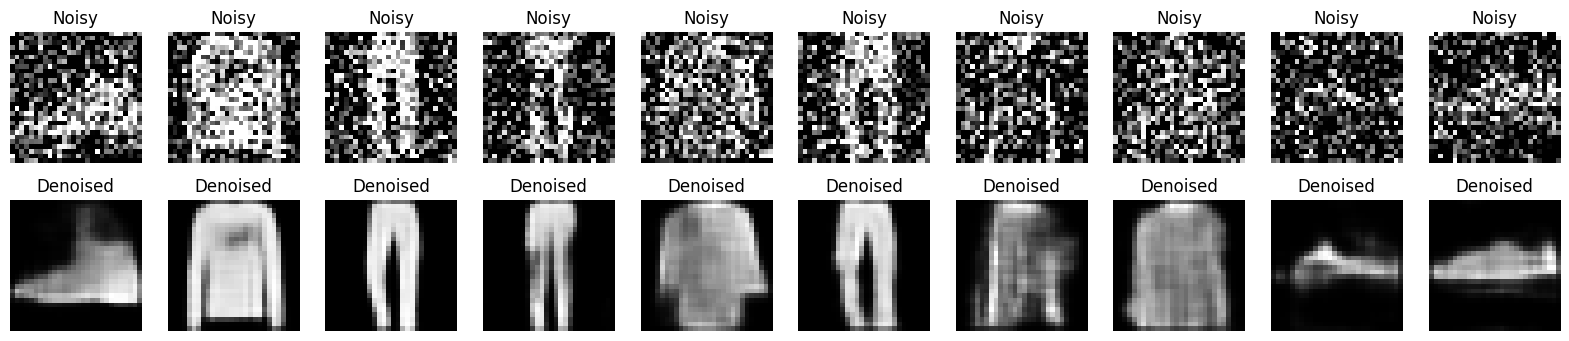

In [22]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
plt.show()


# Evaluate the model

In [11]:

loss = autoencoder.evaluate(x_test_noisy, x_test, verbose=0)
print(f"Test Loss: {loss}")

decoded_imgs = autoencoder.predict(x_test_noisy)
diff = np.abs(decoded_imgs - x_test)
threshold = 0.1  # Adjust this threshold as needed
correct_predictions = np.sum(diff < threshold)
accuracy = correct_predictions / (x_test.shape[0] * x_test.shape[1] * x_test.shape[2])
print(f"Accuracy based on threshold: {accuracy}")


Test Loss: 0.2949157655239105
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy based on threshold: 0.7570655612244898
